In [1]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice
from scipy import stats

import seaborn as sns


In [2]:
def organize_trial_by_trial(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.drop(['reward', 'time'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [3]:
#0 means "next" button
#need to exclude zero?

def organize_trial_by_trial_floatclick(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"type", 1:"game number", 2:"trial", 3:"player", 4:"arm", 5:"probability", 6:"P1 score", 7:"P2 score", 8:""})
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.drop(['type'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [4]:
def organize_trial_by_trial_300(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"type", 1:"game number", 2:"trial", 3:"player", 4:"arm", 5:"probability", 6:"reward", 7:"time", 8:"P1 score", 9:"P2 score"})
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.drop(['type', 'time', 'reward'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [5]:
def get_score(df, player_number, game_number):
    if game_number == 1:
        row = 199
    elif game_number == 2:
        row = 399
    if player_number == 1:
        column = 'P1 score'
    elif player_number == 2:
        column = 'P2 score'
    score = df.loc[row, column]
    return score

In [6]:
#create a dataframes for scores
scores = pd.DataFrame(columns=['s_g1','s_g2','j_g1','j_g2'])

In [7]:
#version is 's' for single player and 'j' for joint
def call_get_score(df, version):
    p1_g1 = get_score(df, 1, 1)
    p1_g2 = get_score(df, 1, 2)
    p1_score_diff = p1_g2 - p1_g1
    if version == 'j':
        p1_g1 = get_score(df, 1, 1)
        p1_g2 = get_score(df, 1, 2)
        p1_score_diff = p1_g2 - p1_g1
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    return p1_g1, p1_g2, p1_score_diff

In [8]:
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    #remove first 20 trials for g2
    df_p1_g2 = df_p1_g2[20:]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [9]:
#needs work
def call_call_get_score(df, version):
    p1_g1 = df+'_'+'p1_'+'g1_'+'score'
    p1_g2 = df+'_'+'p1_'+'g2_'+'score'
    p2_g1 = df+'_'+'p2_'+'g1_'+'score'
    p2_g2 = df+'_'+'p2_'+'g2_'+'score'
    p1_g1, p1_g2, p2_g1, p2_g2 = call_get_score(df, version)
    return p1_g1, p1_g2, p2_g1, p2_g2


# Single Player Analysis

In [10]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s01_gamedata.csv')
s01 = df
s01_p1_g1_score,s01_p1_g2_score,s01_score_diff = call_get_score(s01, 's')
s01.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,90,13,20
41,1,21,2,1,90,13,21
42,1,22,1,3,60,13,21
43,1,22,2,1,90,13,22
44,1,23,1,3,60,13,22


In [11]:
#in the s files, p2 is the confederate
#df = organize_trial_by_trial('data/s02_gamedata.csv')
#s02 = df
#s02_p1_g1_score = get_score(s02, 1, 1)
#s02.head()

In [12]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s03_gamedata.csv')
s03 = df
s03_p1_g1_score,s03_p1_g2_score,s03_score_diff = call_get_score(s03, 's')
s03.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,30,11,19
41,1,21,2,1,90,11,20
42,1,22,1,1,90,12,20
43,1,22,2,1,90,12,21
44,1,23,1,2,60,13,21


In [13]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s05_gamedata.csv')
s05 = df
s05_p1_g1_score,s05_p1_g2_score,s05_score_diff = call_get_score(s05, 's')
s05.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,19,19
41,1,21,2,1,90,19,20
42,1,22,1,3,90,20,20
43,1,22,2,1,90,20,21
44,1,23,1,3,90,21,21


In [14]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s06_gamedata.csv')
s06 = df
s06_p1_g1_score,s06_p1_g2_score,s06_score_diff = call_get_score(s06, 's')
s06.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,19,19
41,1,21,2,1,90,19,20
42,1,22,1,3,90,20,20
43,1,22,2,1,90,20,21
44,1,23,1,3,90,20,21


In [15]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s07_gamedata.csv')
s07 = df
s07_p1_g1_score,s07_p1_g2_score,s07_score_diff = call_get_score(s07, 's')
s07.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,90,12,19
41,1,21,2,1,90,12,20
42,1,22,1,3,60,13,20
43,1,22,2,1,90,13,21
44,1,23,1,2,30,14,21


In [16]:
pd.set_option('display.max_columns', None)  

In [17]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s08_gamedata.csv')
s08 = df
s08_p1_g1_score,s08_p1_g2_score,s08_score_diff = call_get_score(s08, 's')
s08.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,90,18,19
41,1,21,2,1,90,18,20
42,1,22,1,2,90,19,20
43,1,22,2,1,90,19,21
44,1,23,1,2,90,20,21


In [18]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s09_gamedata.csv')
s09 = df
s09_p1_g1_score,s09_p1_g2_score,s09_score_diff = call_get_score(s09, 's')
s09.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,30,12,16
41,1,21,2,1,90,12,17
42,1,22,1,2,30,12,17
43,1,22,2,1,90,12,18
44,1,23,1,1,90,13,18


In [19]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s11_gamedata.csv')
s11 = df
s11_p1_g1_score,s11_p1_g2_score,s11_score_diff = call_get_score(s11, 's')
s11.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,30,12,19
41,1,21,2,0,90,12,19
42,1,22,1,1,30,12,19
43,1,22,2,0,90,13,19
44,1,23,1,3,90,13,20


In [20]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_300('data/s12_gamedata.csv')
s12 = df
s12_p1_g1_score,s12_p1_g2_score,s12_score_diff = call_get_score(s12, 's')
s12.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,90,15,19
41,1,21,2,1,90,15,20
42,1,22,1,2,60,16,20
43,1,22,2,1,90,16,21
44,1,23,1,2,60,17,21


In [21]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s15_gamedata.csv')
s15 = df
s15_p1_g1_score,s15_p1_g2_score,s15_score_diff = call_get_score(s15, 's')
s15.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,30,12,18
41,1,21,2,0,90,12,18
42,1,22,1,2,90,12,19
43,1,22,2,0,90,13,19
44,1,23,1,2,90,13,20


In [22]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s16_gamedata.csv')
s16 = df
s16_p1_g1_score,s16_p1_g2_score,s16_score_diff = call_get_score(s16, 's')
s16.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,90,12,19
41,1,21,2,0,90,12,19
42,1,22,1,2,30,12,20
43,1,22,2,0,90,12,20
44,1,23,1,3,60,12,21


In [23]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_300('data/s19_gamedata.csv')
s19 = df
s19_p1_g1_score,s19_p1_g2_score,s19_score_diff = call_get_score(s19, 's')
s19.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,60,11,16
41,1,21,2,1,90,11,17
42,1,22,1,3,30,11,17
43,1,22,2,1,90,11,18
44,1,23,1,2,60,12,18


In [24]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s17_gamedata.csv')
s17 = df
s17_p1_g1_score,s17_p1_g2_score,s17_score_diff = call_get_score(s17, 's')
s17.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,20,1,2,90,14,19
41,1,21,2,0,90,15,19
42,1,21,1,2,90,15,20
43,1,22,2,0,90,16,20
44,1,22,1,2,90,16,21


In [25]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s20_gamedata.csv')
s20 = df
s20_p1_g1_score,s20_p1_g2_score,s20_score_diff = call_get_score(s20, 's')
s20.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,60,11,19
41,1,21,2,0,90,11,19
42,1,22,1,3,30,11,20
43,1,22,2,0,90,11,20
44,1,23,1,1,90,11,21


# Single score diff between G1 and G2

In [26]:
score_diff = pd.DataFrame({'participant':['s01','s03', 's05', 
                               's06', 's07', 's08', 's09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s08_score_diff, s09_score_diff, s11_score_diff, s12_score_diff, s15_score_diff, s16_score_diff, s17_score_diff, s19_score_diff, s20_score_diff]})

In [27]:
score_diff

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s08,-10
6,s09,5
7,s11,1
8,s12,3
9,s15,15


In [28]:
score_diff_mean = score_diff['score_diff'].mean()

In [29]:
score_diff_mean

4.0

# Single scores in G1 and G2

In [30]:
s_scores_1 = pd.DataFrame({'participant':['s01','s03', 's05', 
                               's06', 's07', 's08', 's09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'], 'score_1':
     [s01_p1_g1_score, s03_p1_g1_score, s05_p1_g1_score,
      s06_p1_g1_score, s07_p1_g1_score, s08_p1_g1_score, s09_p1_g1_score, s11_p1_g1_score, s12_p1_g1_score, s15_p1_g1_score, s16_p1_g1_score, s17_p1_g1_score, s19_p1_g1_score, s20_p1_g1_score]})
s_scores_1.set_index('participant', inplace=True, drop=True)

s_scores_1

,score_1
participant,
s01,60
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65
s11,60
s12,83


In [31]:
s_scores_2 = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'], 'score_2':
    [s01_p1_g2_score, s03_p1_g2_score, s05_p1_g2_score, 
s06_p1_g2_score, s07_p1_g2_score, s08_p1_g2_score, s09_p1_g2_score, s11_p1_g2_score, s12_p1_g2_score, s15_p1_g2_score, s16_p1_g2_score, s17_p1_g2_score, s19_p1_g2_score, s20_p1_g2_score]})
s_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
s_scores_2

,score_2
participant,
s01,74
s03,71
s05,88
s06,87
s07,68
s08,80
s09,70
s11,61
s12,86


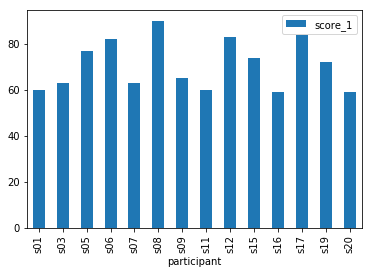

In [32]:
s_scores_1_bar = s_scores_1.plot.bar()

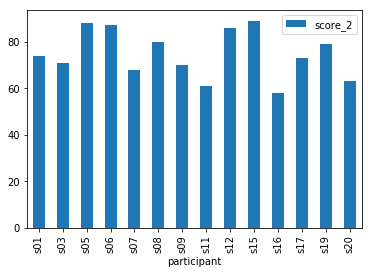

In [33]:
s_scores_2_bar = s_scores_2.plot.bar()

In [34]:
s_scores = pd.merge(s_scores_1, s_scores_2,on='participant')

In [35]:
s_scores

,score_1,score_2
participant,,
s01,60,74
s03,63,71
s05,77,88
s06,82,87
s07,63,68
s08,90,80
s09,65,70
s11,60,61
s12,83,86


In [36]:
s_scores.columns=['Game 1','Game 2']

([<matplotlib.axis.YTick at 0x1a1f628e10>,
 <a list of 6 Text yticklabel objects>)

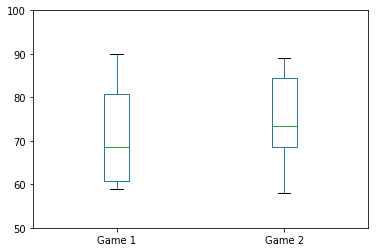

In [37]:
s_scores_box = s_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

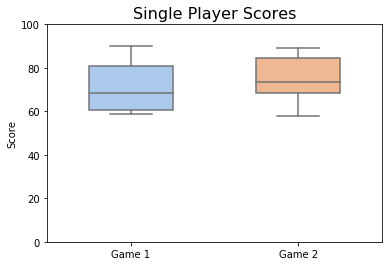

In [38]:
s_scores_box = sns.boxplot( 
                 data=s_scores, 
                 width=0.5,
                 palette="pastel")
s_scores_box.axes.set_title("Single Player Scores",
                    fontsize=16)

plot_file_name="s_score_box.jpg"
 
plt.ylim(0, 100)
s_scores_box.axes.set(ylabel='Score')

# save as jpeg
s_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [39]:
s_scores_p = sp.stats.ttest_rel(s_scores['Game 1'],s_scores['Game 2'])

In [40]:
s_scores_p

Ttest_relResult(statistic=-1.96521473776207, pvalue=0.07112499604880738)

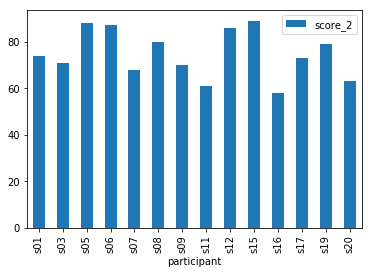

In [41]:
s_scores_2_bar = s_scores_2.plot.bar()

In [42]:
#combine g1 and g2 to one dataframe
s_combo = s_scores_1.append(s_scores_2)

/Users/baryosef/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [43]:
'''s_combo = pd.DataFrame({'participant':['s01', 's01', 's03', 's03','s05', 's05'
                              's06', 's06','s07','s07','s08','s08','s09','s09', 's11', 's11', 's12', 's12', 's15', 's15', 's16', 's16', 's17', 's17', 's19', 's19', 's20', 's20'], 'score':
     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,
      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,
      s09_p1_g1_score, s09_p1_g2_score, s11_p1_g1_score, s11_p1_g2_score, s12_p1_g1_score, s12_p1_g2_score, s15_p1_g1_score, s15_p1_g2_score, s16_p1_g1_score, s16_p1_g2_score, s17_p1_g1_score, s17_p1_g2_score, s19_p1_g1_score, s19_p1_g2_score, s20_p1_g1_score, s20_p1_g2_score]})
s_combo.set_index('participant', inplace=True, drop=True)'''

"s_combo = pd.DataFrame({'participant':['s01', 's01', 's03', 's03','s05', 's05'\n                              's06', 's06','s07','s07','s08','s08','s09','s09', 's11', 's11', 's12', 's12', 's15', 's15', 's16', 's16', 's17', 's17', 's19', 's19', 's20', 's20'], 'score':\n     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,\n      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,\n      s09_p1_g1_score, s09_p1_g2_score, s11_p1_g1_score, s11_p1_g2_score, s12_p1_g1_score, s12_p1_g2_score, s15_p1_g1_score, s15_p1_g2_score, s16_p1_g1_score, s16_p1_g2_score, s17_p1_g1_score, s17_p1_g2_score, s19_p1_g1_score, s19_p1_g2_score, s20_p1_g1_score, s20_p1_g2_score]})\ns_combo.set_index('participant', inplace=True, drop=True)"

In [44]:

#new_index = ('s01_g1','s01_g2','s02_g1','s03_g1','s03_g2','s05_g1','s05_g2', 
                               #'s06_g1','s06_g2','s07_g1','s07_g2','s08_g1','s08_g2','s09_g1','s09_g2')
#s_combo.index = new_index

In [45]:
s_combo = s_combo.sort_values(by=['participant'])

In [46]:
s_combo

,score_1,score_2
participant,,
s01,60.0,NaN
s01,NaN,74.0
s03,63.0,NaN
s03,NaN,71.0
s05,77.0,NaN
s05,NaN,88.0
s06,82.0,NaN
s06,NaN,87.0
s07,63.0,NaN


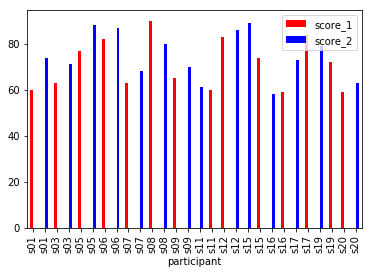

In [47]:
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red', 'red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(s_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
s_combo_bar = s_combo.plot(kind='bar',color=colors)

In [48]:
s_scores_1_mean = s_scores_1.mean()

In [49]:
s_scores_1_mean

score_1    70.785714
dtype: float64

In [50]:
s_scores_1_std = s_scores_1.std()

In [51]:
s_scores_1_std

score_1    10.864045
dtype: float64

In [52]:
s_scores_2_mean = s_scores_2.mean()

In [53]:
s_scores_2_mean

score_2    74.785714
dtype: float64

In [54]:
s_scores_2_std = s_scores_2.std()

In [55]:
s_scores_2_std

score_2    10.356555
dtype: float64

In [56]:
s_scores_med = s_scores.median()
s_scores_med

Game 1    68.5
Game 2    73.5
dtype: float64

# Single Choice Probabilities

In [57]:
#s_list = [s01,s03,s05,s06,s07,s08,s09,s11,s12,s15,s16,s17,s19,s20]

In [58]:
s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
s03_p1_g1, s03_p1_g2 = separate_df(s03, 's')
s05_p1_g1, s05_p1_g2 = separate_df(s05, 's')
s06_p1_g1, s06_p1_g2 = separate_df(s06, 's')
s07_p1_g1, s07_p1_g2 = separate_df(s07, 's')
s08_p1_g1, s08_p1_g2 = separate_df(s08, 's')
s09_p1_g1, s09_p1_g2 = separate_df(s09, 's')
s11_p1_g1, s11_p1_g2 = separate_df(s11, 's')
s12_p1_g1, s12_p1_g2 = separate_df(s12, 's')
s15_p1_g1, s15_p1_g2 = separate_df(s15, 's')
s16_p1_g1, s16_p1_g2 = separate_df(s16, 's')
s17_p1_g1, s17_p1_g2 = separate_df(s17, 's')
s19_p1_g1, s19_p1_g2 = separate_df(s19, 's')
s20_p1_g1, s20_p1_g2 = separate_df(s20, 's')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/baryosef/anaconda3/lib/python3.7/sit

In [59]:
s01_p1_g1_count = s01_p1_g1['probability'].value_counts(sort=False)
s01_p1_g2_count = s01_p1_g2['probability'].value_counts(sort=False)
s03_p1_g1_count = s03_p1_g1['probability'].value_counts(sort=False)
s03_p1_g2_count = s03_p1_g2['probability'].value_counts(sort=False)
s05_p1_g1_count = s05_p1_g1['probability'].value_counts(sort=False)
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)
s06_p1_g1_count = s06_p1_g1['probability'].value_counts(sort=False)
s06_p1_g2_count = s06_p1_g2['probability'].value_counts(sort=False)
s07_p1_g1_count = s07_p1_g1['probability'].value_counts(sort=False)
s07_p1_g2_count = s07_p1_g2['probability'].value_counts(sort=False)
s08_p1_g1_count = s08_p1_g1['probability'].value_counts(sort=False)
s08_p1_g2_count = s08_p1_g2['probability'].value_counts(sort=False)
s09_p1_g1_count = s09_p1_g1['probability'].value_counts(sort=False)
s09_p1_g2_count = s09_p1_g2['probability'].value_counts(sort=False)
s11_p1_g1_count = s11_p1_g1['probability'].value_counts(sort=False)
s11_p1_g2_count = s11_p1_g2['probability'].value_counts(sort=False)
s12_p1_g1_count = s12_p1_g1['probability'].value_counts(sort=False)
s12_p1_g2_count = s12_p1_g2['probability'].value_counts(sort=False)
s15_p1_g1_count = s15_p1_g1['probability'].value_counts(sort=False)
s15_p1_g2_count = s15_p1_g2['probability'].value_counts(sort=False)
s16_p1_g1_count = s16_p1_g1['probability'].value_counts(sort=False)
s16_p1_g2_count = s16_p1_g2['probability'].value_counts(sort=False)
s17_p1_g1_count = s17_p1_g1['probability'].value_counts(sort=False)
s17_p1_g2_count = s17_p1_g2['probability'].value_counts(sort=False)
s19_p1_g1_count = s19_p1_g1['probability'].value_counts(sort=False)
s19_p1_g2_count = s19_p1_g2['probability'].value_counts(sort=False)
s20_p1_g1_count = s20_p1_g1['probability'].value_counts(sort=False)
s20_p1_g2_count = s20_p1_g2['probability'].value_counts(sort=False)

In [60]:
#to see each individual count of probabilities, print: 
#s01_p1_g1_count

# Single choices in G1 

In [61]:
s_g1_counts = pd.DataFrame([s01_p1_g1_count, s03_p1_g1_count, s05_p1_g1_count, s06_p1_g1_count, s07_p1_g1_count, 
                s08_p1_g1_count, s09_p1_g1_count, s11_p1_g1_count, s12_p1_g1_count, s15_p1_g1_count, s16_p1_g1_count,
                    s17_p1_g1_count, s19_p1_g1_count, s20_p1_g1_count],
                          index=['s01_p1_g1_count', 's03_p1_g1_count', 
                            's05_p1_g1_count', 's06_p1_g1_count', 's07_p1_g1_count', 's08_p1_g1_count', 
                                 's09_p1_g1_count', 's11_p1_g1_count', 's12_p1_g1_count', 's15_p1_g1_count', 
                                 's16_p1_g1_count','s17_p1_g1_count', 's19_p1_g1_count', 's20_p1_g1_count'])

In [62]:
#How to prevent NaN: df = df.fillna(0)
s_g1_counts = s_g1_counts.fillna(0)
s_g1_counts

,30,60,90
s01_p1_g1_count,31.0,33.0,16.0
s03_p1_g1_count,21.0,31.0,28.0
s05_p1_g1_count,10.0,35.0,35.0
s06_p1_g1_count,11.0,12.0,57.0
s07_p1_g1_count,18.0,22.0,40.0
s08_p1_g1_count,1.0,6.0,73.0
s09_p1_g1_count,13.0,28.0,39.0
s11_p1_g1_count,24.0,28.0,29.0
s12_p1_g1_count,2.0,24.0,54.0
s15_p1_g1_count,6.0,11.0,64.0


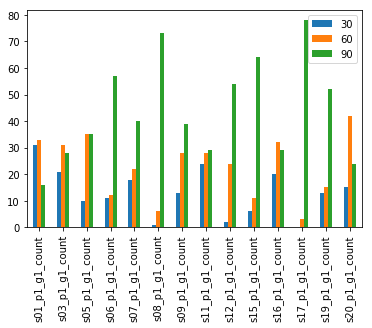

In [63]:
s_g1_counts_bar = s_g1_counts.plot.bar()

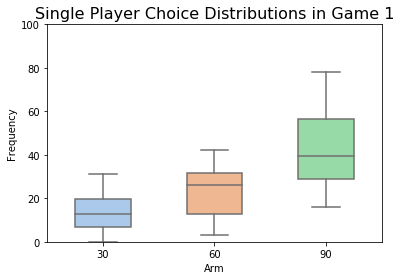

In [64]:
s_g1_counts_box = sns.boxplot( 
                 data=s_g1_counts, 
                 width=0.5,
                 palette="pastel")
s_g1_counts_box.axes.set_title("Single Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="s_g1_counts_box.jpg"
 
plt.ylim(0, 100)
s_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [65]:
s_g1_low = np.mean(s_g1_counts.iloc[:,0])
s_g1_med = np.mean(s_g1_counts.iloc[:,1])
s_g1_high = np.mean(s_g1_counts.iloc[:,2])

In [66]:
s_g1_low

13.214285714285714

In [67]:
s_g1_med

23.0

In [68]:
s_g1_high

44.142857142857146

In [69]:
s_g1_low_std = np.std(s_g1_counts.iloc[:,0])
s_g1_med_std = np.std(s_g1_counts.iloc[:,1])
s_g1_high_std = np.std(s_g1_counts.iloc[:,2])

In [70]:
s_g1_low_std

8.792680165330474

In [71]:
s_g1_med_std

11.40175425099138

In [72]:
s_g1_high_std

18.403637617357617

# Single choices in G2

In [73]:
s_g2_counts = pd.DataFrame([s01_p1_g2_count, s03_p1_g2_count, 
                            s05_p1_g2_count, s06_p1_g2_count, s07_p1_g2_count, s08_p1_g2_count, s09_p1_g2_count,
                            s11_p1_g2_count, s12_p1_g2_count, s15_p1_g2_count, s16_p1_g2_count,
                    s17_p1_g2_count, s19_p1_g2_count, s20_p1_g2_count],
                          index=['s01_p1_g2_count', 's03_p1_g2_count', 's05_p1_g2_count', 's06_p1_g2_count',
                                 's07_p1_g2_count', 's08_p1_g2_count', 's09_p1_g2_count', 's11_p1_g2_count', 
                                 's12_p1_g2_count', 's15_p1_g2_count', 's16_p1_g2_count','s17_p1_g2_count', 
                                 's19_p1_g2_count', 's20_p1_g2_count'])

In [74]:
#How to prevent NaN: df = df.fillna(0)
s_g2_counts = s_g2_counts.fillna(0)
s_g2_counts

,30,60,90
s01_p1_g2_count,31.0,13.0,36.0
s03_p1_g2_count,20.0,21.0,39.0
s05_p1_g2_count,0.0,0.0,80.0
s06_p1_g2_count,0.0,6.0,74.0
s07_p1_g2_count,13.0,22.0,45.0
s08_p1_g2_count,6.0,11.0,63.0
s09_p1_g2_count,8.0,31.0,41.0
s11_p1_g2_count,22.0,24.0,35.0
s12_p1_g2_count,4.0,4.0,72.0
s15_p1_g2_count,2.0,7.0,72.0


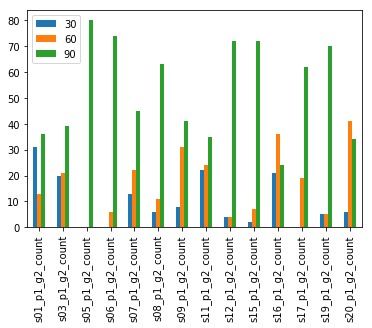

In [75]:
s_g2_counts_bar = s_g2_counts.plot.bar()

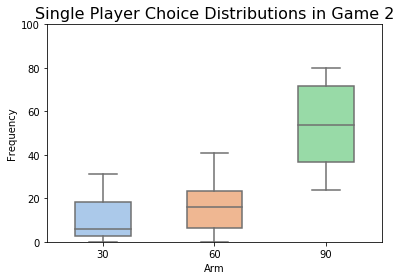

In [76]:
s_g2_counts_box = sns.boxplot( 
                 data=s_g2_counts, 
                 width=0.5,
                 palette="pastel")
s_g2_counts_box.axes.set_title("Single Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="s_g2_counts_box.jpg"
 
plt.ylim(0, 100)
s_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [77]:
s_g2_low = np.mean(s_g2_counts.iloc[:,0])
s_g2_med = np.mean(s_g2_counts.iloc[:,1])
s_g2_high = np.mean(s_g2_counts.iloc[:,2])

In [78]:
s_g2_low

9.857142857142858

In [79]:
s_g2_med

17.142857142857142

In [80]:
s_g2_high

53.357142857142854

In [81]:
s_g2_low_std = np.std(s_g2_counts.iloc[:,0])
s_g2_med_std = np.std(s_g2_counts.iloc[:,1])
s_g2_high_std = np.std(s_g2_counts.iloc[:,2])

In [82]:
s_g2_low_std

9.54580792702178

In [83]:
s_g2_med_std

12.25244665279518

In [84]:
s_g2_high_std

18.085539380783686

# Single arrays

In [85]:
#pip install researchpy

In [86]:
import researchpy as rp

In [87]:
s_90_1 = np.array(s_g1_counts.iloc[:,2])
s_90_2 = np.array(s_g2_counts.iloc[:,2])

In [88]:
s_90_1

array([16., 28., 35., 57., 40., 73., 39., 29., 54., 64., 29., 78., 52.,
       24.])

In [89]:
s_90_2

array([36., 39., 80., 74., 45., 63., 41., 35., 72., 72., 24., 62., 70.,
       34.])

In [90]:
s_60_1 = np.array(s_g1_counts.iloc[:,1])
s_60_2 = np.array(s_g2_counts.iloc[:,1])

In [91]:
s_60_1

array([33., 31., 35., 12., 22.,  6., 28., 28., 24., 11., 32.,  3., 15.,
       42.])

In [92]:
s_60_2

array([13., 21.,  0.,  6., 22., 11., 31., 24.,  4.,  7., 36., 19.,  5.,
       41.])

In [93]:
s_30_1 = np.array(s_g1_counts.iloc[:,0])
s_30_2 = np.array(s_g2_counts.iloc[:,0])

In [94]:
s_30_1

array([31., 21., 10., 11., 18.,  1., 13., 24.,  2.,  6., 20.,  0., 13.,
       15.])

In [95]:
s_30_2

array([31., 20.,  0.,  0., 13.,  6.,  8., 22.,  4.,  2., 21.,  0.,  5.,
        6.])

# Single choice statistics

In [96]:
s_90_p = sp.stats.ttest_rel(s_90_1,s_90_2)
s_60_p = sp.stats.ttest_rel(s_60_1,s_60_2)
s_30_p = sp.stats.ttest_rel(s_30_1,s_30_2)

In [97]:
s_90_p

Ttest_relResult(statistic=-2.306600377694021, pvalue=0.03818813008201623)

In [98]:
s_60_p

Ttest_relResult(statistic=1.7162590776826194, pvalue=0.10983160524464454)

In [99]:
s_30_p

Ttest_relResult(statistic=2.5755841344505974, pvalue=0.02304867872159833)

In [100]:
#maximizing and matching?

# Joint Analysis

In [101]:
df = organize_trial_by_trial('data/j01_gamedata.csv')
j01 = df
j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j01_p1_diff,j01_p2_diff = call_get_score(j01, 'j')
j01.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,30,8,15
41,1,21,2,3,60,8,15
42,1,22,1,1,90,9,15
43,1,22,2,1,30,9,15
44,1,23,1,2,30,9,15


In [102]:
df = organize_trial_by_trial('data/j02_gamedata.csv')
j02 = df
j02_p1_g1_score,j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j02_p1_diff,j02_p2_diff = call_get_score(j02, 'j')
j02.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,60,8,13
41,1,21,2,3,90,8,14
42,1,22,1,2,90,9,14
43,1,22,2,3,90,9,15
44,1,23,1,3,30,10,15


In [103]:
df = organize_trial_by_trial('data/j03_gamedata.csv')
j03 = df
j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j03_p1_diff,j03_p2_diff = call_get_score(j03, 'j')
j03.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,30,16,14
41,1,21,2,2,30,16,15
42,1,22,1,3,30,17,15
43,1,22,2,1,60,17,15
44,1,23,1,3,30,17,15


In [104]:
df = organize_trial_by_trial('data/j04_gamedata.csv')
j04 = df
j04_p1_g1_score,j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j04_p1_diff,j04_p2_diff = call_get_score(j04, 'j')
j04.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,30,13,11
41,1,21,2,1,30,13,11
42,1,22,1,2,30,14,11
43,1,22,2,1,30,14,11
44,1,23,1,3,60,15,11


In [105]:
df = organize_trial_by_trial('data/j05_gamedata.csv')
j05 = df
j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j05_p1_diff,j05_p2_diff = call_get_score(j05, 'j')
j05.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,90,15,13
41,1,21,2,1,90,15,14
42,1,22,1,2,90,16,14
43,1,22,2,3,60,16,15
44,1,23,1,2,90,17,15


In [106]:
df = organize_trial_by_trial('data/j06_gamedata.csv')
j06 = df
j06_p1_g1_score,j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score,j06_p1_diff,j06_p2_diff = call_get_score(j06, 'j')
j06.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,30,11,17
41,1,21,2,1,30,11,17
42,1,22,1,2,60,11,17
43,1,22,2,1,30,11,17
44,1,23,1,3,30,11,17


In [107]:
df = organize_trial_by_trial('data/j07_gamedata.csv')
j07 = df
j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,j07_p2_g2_score,j07_p1_diff,j07_p2_diff = call_get_score(j07, 'j')
j07.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,60,14,15
41,1,21,2,1,90,14,16
42,1,22,1,3,90,15,16
43,1,22,2,1,90,15,16
44,1,23,1,2,60,16,16


In [108]:
df = organize_trial_by_trial('data/j08_gamedata.csv')
j08 = df
j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score,j08_p1_diff,j08_p2_diff = call_get_score(j08, 'j')
j08.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,90,14,14
41,1,21,2,2,30,14,14
42,1,22,1,3,60,15,14
43,1,22,2,3,60,15,14
44,1,23,1,2,90,16,14


In [109]:
df = organize_trial_by_trial_floatclick('data/j10_gamedata.csv')
j10 = df
j10_p1_g1_score,j10_p1_g2_score,j10_p2_g1_score,j10_p2_g2_score,j10_p1_diff,j10_p2_diff = call_get_score(j10, 'j')
j10.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,13,14
41,1,21,2,1,60,14,14
42,1,22,1,2,30,14,14
43,1,22,2,3,30,14,14
44,1,22,1,1,60,14,15


In [110]:
df = organize_trial_by_trial_floatclick('data/j11_gamedata.csv')
j11 = df
j11_p1_g1_score,j11_p1_g2_score,j11_p2_g1_score,j11_p2_g2_score,j11_p1_diff,j11_p2_diff = call_get_score(j11, 'j')
j11.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,14,14
41,1,21,2,1,90,15,14
42,1,22,1,2,60,15,15
43,1,22,2,2,60,16,15
44,1,23,1,3,90,16,16


# Joint score diff (p1) 

In [111]:
score_diff_p1 = pd.DataFrame({'participant':['j01','j02','j03','j04','j05','j06','j07','j08','j10','j11'], 'score_diff':
        [j01_p1_diff, j02_p1_diff,j03_p1_diff,j04_p1_diff,
      j05_p1_diff,j06_p1_diff,j07_p1_diff,
      j08_p1_diff,j10_p1_diff,j11_p1_diff]})
score_diff_p1

,participant,score_diff
0,j01,16
1,j02,18
2,j03,13
3,j04,-4
4,j05,-7
5,j06,22
6,j07,10
7,j08,23
8,j10,10
9,j11,-3


In [112]:
score_diff_p1_mean = score_diff_p1['score_diff'].mean()
score_diff_p1_mean

9.8

# Joint scores in G1 and G2 (p1)

In [113]:
jp1_scores_1 = pd.DataFrame({'participant':['j01','j02','j03','j04','j05','j06','j07','j08','j10','j11'], 'jp1_score_1':
     [j01_p1_g1_score,j02_p1_g1_score,j03_p1_g1_score,j04_p1_g1_score,
      j05_p1_g1_score,j06_p1_g1_score,j07_p1_g1_score,
      j08_p1_g1_score,j10_p1_g1_score,j11_p1_g1_score]})
jp1_scores_1.set_index('participant', inplace=True, drop=True)
jp1_scores_1
      

,jp1_score_1
participant,
j01,57
j02,54
j03,69
j04,64
j05,77
j06,54
j07,74
j08,60
j10,66


In [114]:
jp1_scores_2 = pd.DataFrame({'participant':['j01','j02','j03','j04',
    'j05','j06','j07','j08','j10','j11'], 'jp1_score_2':
     [j01_p1_g2_score,j02_p1_g2_score,j03_p1_g2_score,j04_p1_g2_score,
      j05_p1_g2_score,j06_p1_g2_score,j07_p1_g2_score,
      j08_p1_g2_score,j10_p1_g2_score,j11_p1_g2_score]})
jp1_scores_2.set_index('participant', inplace=True, drop=True)
jp1_scores_2

,jp1_score_2
participant,
j01,73
j02,72
j03,82
j04,60
j05,70
j06,76
j07,84
j08,83
j10,76


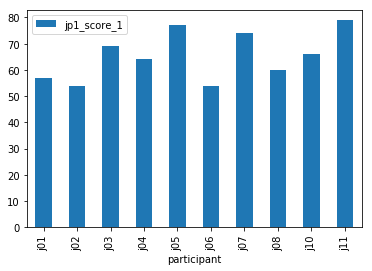

In [115]:
jp1_scores_1_bar = jp1_scores_1.plot.bar()

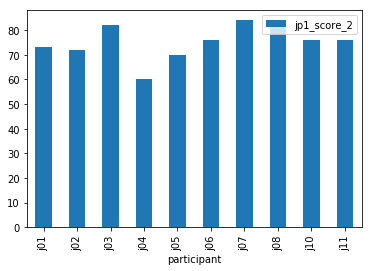

In [116]:
jp1_scores_2_bar = jp1_scores_2.plot.bar()

In [117]:
jp1_scores = pd.merge(jp1_scores_1, jp1_scores_2, on = 'participant')
jp1_scores.columns=['Game 1','Game 2']
#jp1_scores.set_index('participant', inplace=True, drop=True)
jp1_scores




#alternativeley, use jp1_scores = jp1_scores_1.merge(jp1_scores_2, how='outer', left_index=True, right_index=True)
#jp1_scores = pd.concat([jp1_scores_1,jp1_scores_2],axis=1,sort=False)

,Game 1,Game 2
participant,,
j01,57,73
j02,54,72
j03,69,82
j04,64,60
j05,77,70
j06,54,76
j07,74,84
j08,60,83
j10,66,76


([<matplotlib.axis.YTick at 0x1a203e2128>,
 <a list of 6 Text yticklabel objects>)

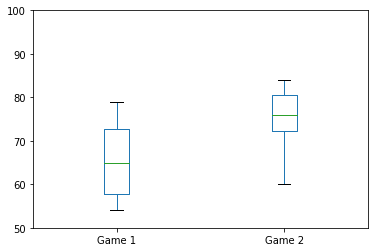

In [118]:
jp1_scores_box =jp1_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

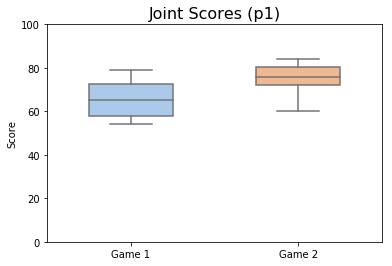

In [119]:
jp1_scores_box = sns.boxplot( 
                 data=jp1_scores, 
                 width=0.5,
                 palette="pastel")
jp1_scores_box.axes.set_title("Joint Scores (p1)",
                    fontsize=16)

plot_file_name="jp1_score_box.jpg"
 
plt.ylim(0, 100)
jp1_scores_box.axes.set(ylabel='Score')

# save as jpeg
jp1_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [120]:
jp1_scores_p = sp.stats.ttest_rel(jp1_scores['Game 1'],jp1_scores['Game 2'])

In [121]:
jp1_scores_p

Ttest_relResult(statistic=-2.834796798634784, pvalue=0.01956860885438532)

In [122]:
#combine g1 and g2 to one dataframe
jp1_combo = jp1_scores_1.append(jp1_scores_2)

/Users/baryosef/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [123]:
'''jp1_combo = pd.DataFrame({'participant':['j01', 'j02', 'j03', 'j04', 'j05', 'j06', 'j07', 'j08', 'j10', 'j11','j12'],'score':
[j01_p1_g1_score, j01_p1_g2_score, j02_p1_g1_score, j02_p1_g2_score, j03_p1_g1_score, j03_p1_g2_score, 
    j04_p1_g1_score, j04_p1_g2_score, j05_p1_g1_score, j05_p1_g2_score, j06_p1_g1_score, j06_p1_g2_score,
    j07_p1_g1_score, j07_p1_g2_score, j08_p1_g1_score, j08_p1_g2_score, j10_p1_g1_score, j10_p1_g2_score,
    j11_p1_g1_score, j11_p1_g2_score, j12_p1_g1_score, j12_p1_g2_score]})'''

"jp1_combo = pd.DataFrame({'participant':['j01', 'j02', 'j03', 'j04', 'j05', 'j06', 'j07', 'j08', 'j10', 'j11','j12'],'score':\n[j01_p1_g1_score, j01_p1_g2_score, j02_p1_g1_score, j02_p1_g2_score, j03_p1_g1_score, j03_p1_g2_score, \n    j04_p1_g1_score, j04_p1_g2_score, j05_p1_g1_score, j05_p1_g2_score, j06_p1_g1_score, j06_p1_g2_score,\n    j07_p1_g1_score, j07_p1_g2_score, j08_p1_g1_score, j08_p1_g2_score, j10_p1_g1_score, j10_p1_g2_score,\n    j11_p1_g1_score, j11_p1_g2_score, j12_p1_g1_score, j12_p1_g2_score]})"

In [124]:
#jp1_combo.set_index('participant', inplace=True, drop=True)

In [125]:
jp1_combo = jp1_combo.sort_values(by=['participant'])

In [126]:
jp1_combo

,jp1_score_1,jp1_score_2
participant,,
j01,57.0,NaN
j01,NaN,73.0
j02,54.0,NaN
j02,NaN,72.0
j03,69.0,NaN
j03,NaN,82.0
j04,64.0,NaN
j04,NaN,60.0
j05,77.0,NaN


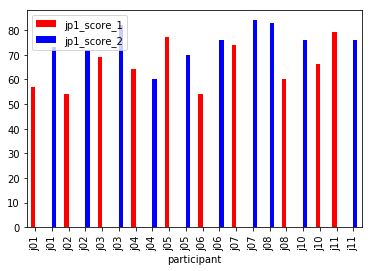

In [127]:
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(jp1_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
jp1_combo_bar = jp1_combo.plot(kind='bar',color=colors)

In [128]:
jp1_scores_1_mean = jp1_scores_1.mean()

In [129]:
jp1_scores_1_mean

jp1_score_1    65.4
dtype: float64

In [130]:
jp1_scores_1_std = jp1_scores_1.std()

In [131]:
jp1_scores_1_std

jp1_score_1    9.24001
dtype: float64

In [132]:
jp1_scores_2_mean = jp1_scores_2.mean()

In [133]:
jp1_scores_2_mean

jp1_score_2    75.2
dtype: float64

In [134]:
jp1_scores_2_std = jp1_scores_1.std()

In [135]:
jp1_scores_2_std

jp1_score_1    9.24001
dtype: float64

In [136]:
jp1_scores_med = jp1_scores.median()
jp1_scores_med

Game 1    65.0
Game 2    76.0
dtype: float64

# Joint Choice Probabilities (p1)

In [137]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')
j10_p1_g1, j10_p1_g2, j10_p2_g1, j10_p2_g2 = separate_df(j10, 'j')
j11_p1_g1, j11_p1_g2, j11_p2_g1, j11_p2_g2 = separate_df(j11, 'j')


/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/b

In [138]:
j01_p1_g1_count = j01_p1_g1['probability'].value_counts(sort=False)
j01_p1_g2_count = j01_p1_g2['probability'].value_counts(sort=False)
j01_p2_g1_count = j01_p2_g1['probability'].value_counts(sort=False)
j01_p2_g2_count = j01_p2_g2['probability'].value_counts(sort=False)
j02_p1_g1_count = j02_p1_g1['probability'].value_counts(sort=False)
j02_p1_g2_count = j02_p1_g2['probability'].value_counts(sort=False)
j02_p2_g1_count = j02_p2_g1['probability'].value_counts(sort=False)
j02_p2_g2_count = j02_p2_g2['probability'].value_counts(sort=False)
j03_p1_g1_count = j03_p1_g1['probability'].value_counts(sort=False)
j03_p1_g2_count = j03_p1_g2['probability'].value_counts(sort=False)
j03_p2_g1_count = j03_p2_g1['probability'].value_counts(sort=False)
j03_p2_g2_count = j03_p2_g2['probability'].value_counts(sort=False)
j04_p1_g1_count = j04_p1_g1['probability'].value_counts(sort=False)
j04_p1_g2_count = j04_p1_g2['probability'].value_counts(sort=False)
j04_p2_g1_count = j04_p2_g1['probability'].value_counts(sort=False)
j04_p2_g2_count = j04_p2_g2['probability'].value_counts(sort=False)
j05_p1_g1_count = j05_p1_g1['probability'].value_counts(sort=False)
j05_p1_g2_count = j05_p1_g2['probability'].value_counts(sort=False)
j05_p2_g1_count = j05_p2_g1['probability'].value_counts(sort=False)
j05_p2_g2_count = j05_p2_g2['probability'].value_counts(sort=False)
j06_p1_g1_count = j06_p1_g1['probability'].value_counts(sort=False)
j06_p1_g2_count = j06_p1_g2['probability'].value_counts(sort=False)
j06_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j06_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j07_p1_g1_count = j07_p1_g1['probability'].value_counts(sort=False)
j07_p1_g2_count = j07_p1_g2['probability'].value_counts(sort=False)
j07_p2_g1_count = j07_p2_g1['probability'].value_counts(sort=False)
j07_p2_g2_count = j07_p2_g2['probability'].value_counts(sort=False)
j08_p1_g1_count = j08_p1_g1['probability'].value_counts(sort=False)
j08_p1_g2_count = j08_p1_g2['probability'].value_counts(sort=False)
j08_p2_g1_count = j08_p2_g1['probability'].value_counts(sort=False)
j08_p2_g2_count = j08_p2_g2['probability'].value_counts(sort=False)
j10_p1_g1_count = j10_p1_g1['probability'].value_counts(sort=False)
j10_p1_g2_count = j10_p1_g2['probability'].value_counts(sort=False)
j10_p2_g1_count = j10_p2_g1['probability'].value_counts(sort=False)
j10_p2_g2_count = j10_p2_g2['probability'].value_counts(sort=False)
j11_p1_g1_count = j11_p1_g1['probability'].value_counts(sort=False)
j11_p1_g2_count = j11_p1_g2['probability'].value_counts(sort=False)
j11_p2_g1_count = j11_p2_g1['probability'].value_counts(sort=False)
j11_p2_g2_count = j11_p2_g2['probability'].value_counts(sort=False)

# Joint choices in G1 (p1)

In [139]:
jp1_g1_counts = pd.DataFrame([j01_p1_g1_count, j02_p1_g1_count, j03_p1_g1_count,j04_p1_g1_count, j05_p1_g1_count,
                              j06_p1_g1_count, j07_p1_g1_count, j08_p1_g1_count, j10_p1_g1_count, j11_p1_g1_count],
               index=['j01_p1_g1_count', 'j02_p1_g1_count', 'j03_p1_g1_count', 'j04_p1_g1_count', 
                      'j05_p1_g1_count', 'j06_p1_g1_count', 'j07_p1_g1_count', 'j08_p1_g1_count', 'j10_p1_g1_count', 'j11_p1_g1_count'])              

In [140]:
#How to prevent NaN
jp1_g1_counts = jp1_g1_counts.fillna(0)
#print
jp1_g1_counts

,30,60,90
j01_p1_g1_count,31.0,30.0,19.0
j02_p1_g1_count,27.0,25.0,28.0
j03_p1_g1_count,16.0,22.0,42.0
j04_p1_g1_count,20.0,31.0,29.0
j05_p1_g1_count,3.0,11.0,66.0
j06_p1_g1_count,28.0,28.0,24.0
j07_p1_g1_count,2.0,27.0,51.0
j08_p1_g1_count,29.0,32.0,19.0
j10_p1_g1_count,19.0,22.0,40.0
j11_p1_g1_count,0.0,33.0,48.0


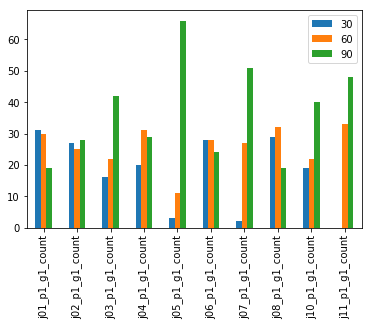

In [141]:
jp1_g1_counts_bar = jp1_g1_counts.plot.bar()

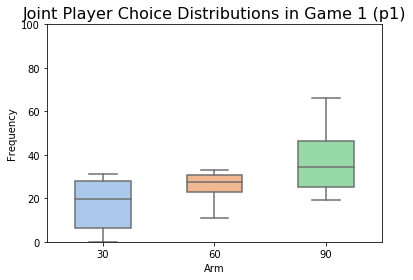

In [142]:
jp1_g1_counts_box = sns.boxplot( 
                 data=jp1_g1_counts, 
                 width=0.5,
                 palette="pastel")
jp1_g1_counts_box.axes.set_title("Joint Player Choice Distributions in Game 1 (p1)",
                    fontsize=16)

plot_file_name="jp1_g1_counts_box.jpg"
 
plt.ylim(0, 100)
jp1_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
jp1_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [143]:
jp1_g1_low = np.mean(jp1_g1_counts.iloc[:,0])
jp1_g1_med = np.mean(jp1_g1_counts.iloc[:,1])
jp1_g1_high = np.mean(jp1_g1_counts.iloc[:,2])

In [144]:
jp1_g1_low

17.5

In [145]:
jp1_g1_med

26.1

In [146]:
jp1_g1_high

36.6

In [147]:
jp1_g1_low_std = np.std(jp1_g1_counts.iloc[:,0])
jp1_g1_med_std = np.std(jp1_g1_counts.iloc[:,1])
jp1_g1_high_std = np.std(jp1_g1_counts.iloc[:,2])

In [148]:
jp1_g1_low_std

11.324751652906125

In [149]:
jp1_g1_med_std

6.236184731067546

In [150]:
jp1_g1_high_std

14.671059948074642

# Joint choices in G2 (p1)

In [151]:
jp1_g2_counts = pd.DataFrame([j01_p1_g2_count, j02_p1_g2_count, j03_p1_g2_count, j04_p1_g2_count, j05_p1_g2_count , 
                j06_p1_g2_count, j07_p1_g2_count, j08_p1_g2_count, j10_p1_g2_count, j11_p1_g2_count],
                          index=['j01_p1_g2_count', 'j02_p1_g2_count', 'j03_p1_g2_count', 'j04_p1_g2_count', 'j05_p1_g2_count' , 
                'j06_p1_g2_count', 'j07_p1_g2_count', 'j08_p1_g2_count', 'j10_p1_g2_count', 'j11_p1_g2_count'])

In [152]:
jp1_g2_counts

,30,60,90
j01_p1_g2_count,13.0,22.0,45.0
j02_p1_g2_count,20.0,25.0,35.0
j03_p1_g2_count,3.0,17.0,60.0
j04_p1_g2_count,33.0,26.0,21.0
j05_p1_g2_count,12.0,9.0,59.0
j06_p1_g2_count,9.0,20.0,51.0
j07_p1_g2_count,2.0,1.0,77.0
j08_p1_g2_count,2.0,2.0,76.0
j10_p1_g2_count,18.0,26.0,37.0
j11_p1_g2_count,NaN,17.0,64.0


In [153]:
#how to prevent NaN
jp1_g2_counts = jp1_g2_counts.fillna(0)

In [154]:
jp1_g2_counts

,30,60,90
j01_p1_g2_count,13.0,22.0,45.0
j02_p1_g2_count,20.0,25.0,35.0
j03_p1_g2_count,3.0,17.0,60.0
j04_p1_g2_count,33.0,26.0,21.0
j05_p1_g2_count,12.0,9.0,59.0
j06_p1_g2_count,9.0,20.0,51.0
j07_p1_g2_count,2.0,1.0,77.0
j08_p1_g2_count,2.0,2.0,76.0
j10_p1_g2_count,18.0,26.0,37.0
j11_p1_g2_count,0.0,17.0,64.0


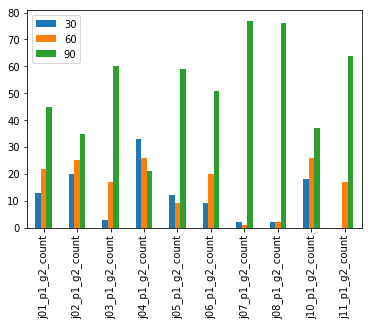

In [155]:
jp1_g2_counts_bar = jp1_g2_counts.plot.bar()

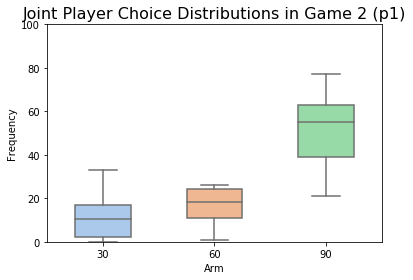

In [156]:
jp1_g2_counts_box = sns.boxplot( 
                 data=jp1_g2_counts, 
                 width=0.5,
                 palette="pastel")
jp1_g2_counts_box.axes.set_title("Joint Player Choice Distributions in Game 2 (p1)",
                    fontsize=16)

plot_file_name="jp1_2_counts_box.jpg"
 
plt.ylim(0, 100)
jp1_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
jp1_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [157]:
jp1_g2_low = np.mean(jp1_g2_counts.iloc[:,0])
jp1_g2_med = np.mean(jp1_g2_counts.iloc[:,1])
jp1_g2_high = np.mean(jp1_g2_counts.iloc[:,2])

In [158]:
jp1_g2_low

11.2

In [159]:
jp1_g2_med

16.5

In [160]:
jp1_g2_high

52.5

In [161]:
jp1_g2_low_std = np.std(jp1_g2_counts.iloc[:,0])
jp1_g2_med_std = np.std(jp1_g2_counts.iloc[:,1])
jp1_g2_high_std = np.std(jp1_g2_counts.iloc[:,2])

In [162]:
jp1_g2_low_std

9.846826900072937

In [163]:
jp1_g2_med_std

8.958236433584458

In [164]:
jp1_g2_high_std

17.264124652005965

In [165]:
#does everyone do better in the second game? 
#does the player that did better in the first game always do better in the second game?

# Joint arrays (p1)

In [166]:
#pip install researchpy

In [167]:
import researchpy as rp

In [168]:
jp1_90_1 = np.array(jp1_g1_counts.iloc[:,2])
jp1_90_2 = np.array(jp1_g2_counts.iloc[:,2])

In [169]:
jp1_90_1

array([19., 28., 42., 29., 66., 24., 51., 19., 40., 48.])

In [170]:
jp1_90_2

array([45., 35., 60., 21., 59., 51., 77., 76., 37., 64.])

In [171]:
jp1_60_1 = np.array(jp1_g1_counts.iloc[:,1])
jp1_60_2 = np.array(jp1_g2_counts.iloc[:,1])

In [172]:
jp1_60_1

array([30., 25., 22., 31., 11., 28., 27., 32., 22., 33.])

In [173]:
jp1_60_2

array([22., 25., 17., 26.,  9., 20.,  1.,  2., 26., 17.])

In [174]:
jp1_30_1 = np.array(jp1_g1_counts.iloc[:,0])
jp1_30_2 = np.array(jp1_g2_counts.iloc[:,0])

In [175]:
jp1_30_1

array([31., 27., 16., 20.,  3., 28.,  2., 29., 19.,  0.])

In [176]:
jp1_30_2

array([13., 20.,  3., 33., 12.,  9.,  2.,  2., 18.,  0.])

# Joint choice statistics (p1)

In [177]:
jp1_90_p = sp.stats.ttest_rel(jp1_90_1,jp1_90_2)
jp1_60_p = sp.stats.ttest_rel(jp1_60_1,jp1_60_2)
jp1_30_p = sp.stats.ttest_rel(jp1_30_1,jp1_30_2)

In [178]:
jp1_90_p

Ttest_relResult(statistic=-2.530619714514941, pvalue=0.032202611020818644)

In [179]:
jp1_60_p

Ttest_relResult(statistic=2.7355473043785885, pvalue=0.023014653535806687)

In [180]:
jp1_30_p

Ttest_relResult(statistic=1.5503786783109128, pvalue=0.15546275085215425)

In [181]:
#maximizing and matching?

# Joint score diff (p2)

In [182]:
score_diff_p2 = pd.DataFrame({'participant':['j01','j02','j03','j04','j05','j06','j07','j08','j10','j11'], 'score_diff':
        [j01_p2_diff, j02_p2_diff,j03_p2_diff,j04_p2_diff,
      j05_p2_diff,j06_p2_diff,j07_p2_diff,
      j08_p2_diff,j10_p2_diff,j11_p2_diff]})
score_diff_p2

,participant,score_diff
0,j01,-1
1,j02,8
2,j03,8
3,j04,-2
4,j05,8
5,j06,14
6,j07,-6
7,j08,14
8,j10,3
9,j11,2


In [183]:
score_diff_p2_mean = score_diff_p2['score_diff'].mean()
score_diff_p2_mean

4.8

# Joint scores in G1 and G2 (p2)

In [184]:
jp2_scores_1 = pd.DataFrame({'participant':['j01','j02','j03','j04',
    'j05','j06','j07','j08','j10','j11'], 'jp2_score_1':
      [j01_p2_g1_score,j02_p2_g1_score,j03_p2_g1_score,j04_p2_g1_score,
       j05_p2_g1_score,j06_p2_g1_score,j07_p2_g1_score,
       j08_p2_g1_score, j10_p2_g1_score,j11_p2_g1_score]})
jp2_scores_1.set_index('participant', inplace=True, drop=True)
jp2_scores_1

,jp2_score_1
participant,
j01,61
j02,68
j03,67
j04,56
j05,70
j06,61
j07,80
j08,57
j10,75


In [185]:
#j_scores_1.set_index('participant', inplace=True, drop=True)
jp2_scores_2 = pd.DataFrame({'participant':['j01','j02','j03','j04',
    'j05','j06','j07','j08','j10','j11'], 'jp2_score_2':
     [j01_p2_g2_score,j02_p2_g2_score,j03_p2_g2_score,j04_p2_g2_score,
      j05_p2_g2_score,j06_p2_g2_score,j07_p2_g2_score,
      j08_p2_g2_score,j10_p2_g2_score,j11_p2_g2_score]})
jp2_scores_2.set_index('participant', inplace=True, drop=True)
jp2_scores_2
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)

,jp2_score_2
participant,
j01,60
j02,76
j03,75
j04,54
j05,78
j06,75
j07,74
j08,71
j10,78


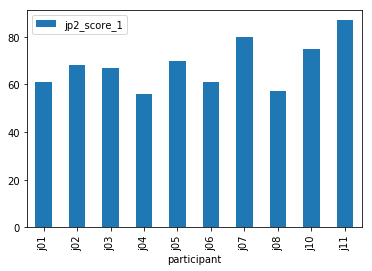

In [186]:
jp2_scores_1_bar = jp2_scores_1.plot.bar()

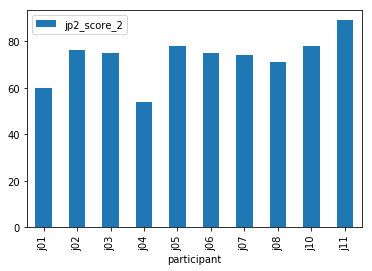

In [187]:
jp2_scores_2_bar = jp2_scores_2.plot.bar()

In [188]:
jp2_scores = pd.merge(jp2_scores_1, jp2_scores_2, on = 'participant')
jp2_scores.columns=['Game 1','Game 2']
#jp1_scores.set_index('participant', inplace=True, drop=True)
jp2_scores

,Game 1,Game 2
participant,,
j01,61,60
j02,68,76
j03,67,75
j04,56,54
j05,70,78
j06,61,75
j07,80,74
j08,57,71
j10,75,78


([<matplotlib.axis.YTick at 0x1a20eac978>,
 <a list of 6 Text yticklabel objects>)

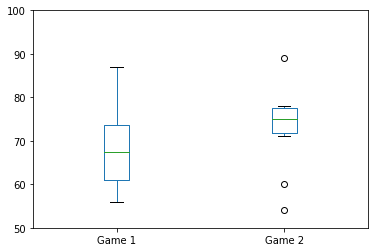

In [189]:
jp2_scores_box =jp2_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

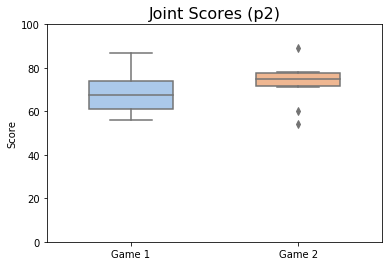

In [190]:
jp2_scores_box = sns.boxplot( 
                 data=jp2_scores, 
                 width=0.5,
                 palette="pastel")
jp2_scores_box.axes.set_title("Joint Scores (p2)",
                    fontsize=16)

plot_file_name="jp2_score_box.jpg"
 
plt.ylim(0, 100)
jp2_scores_box.axes.set(ylabel='Score')

# save as jpeg
jp2_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [191]:
jp2_scores_p = sp.stats.ttest_rel(jp1_scores['Game 1'],jp1_scores['Game 2'])

In [192]:
jp2_scores_p

Ttest_relResult(statistic=-2.834796798634784, pvalue=0.01956860885438532)

In [193]:
jp2_combo = jp2_scores_1.append(jp2_scores_2)

/Users/baryosef/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [194]:
'''jp2_combo = pd.DataFrame({'participant':['j01', 'j02', 'j03', 'j04', 'j05', 'j06', 'j07', 'j08', 'j10', 'j11','j12'],'score':
[j01_p2_g1_score,j01_p2_g2_score,j02_p2_g1_score,j02_p2_g2_score,j03_p2_g1_score,j03_p2_g2_score,j04_p2_g1_score,j04_p2_g2_score,
      j05_p2_g1_score,j05_p2_g2_score,j06_p2_g1_score,j06_p2_g2_score,j07_p2_g1_score,j07_p2_g2_score,
      j08_p2_g1_score,j08_p2_g2_score,j10_p2_g1_score,j10_p2_g2_score,j11_p2_g1_score,j11_p2_g2_score,j12_p2_g1_score,j12_p2_g2_score]})'''

"jp2_combo = pd.DataFrame({'participant':['j01', 'j02', 'j03', 'j04', 'j05', 'j06', 'j07', 'j08', 'j10', 'j11','j12'],'score':\n[j01_p2_g1_score,j01_p2_g2_score,j02_p2_g1_score,j02_p2_g2_score,j03_p2_g1_score,j03_p2_g2_score,j04_p2_g1_score,j04_p2_g2_score,\n      j05_p2_g1_score,j05_p2_g2_score,j06_p2_g1_score,j06_p2_g2_score,j07_p2_g1_score,j07_p2_g2_score,\n      j08_p2_g1_score,j08_p2_g2_score,j10_p2_g1_score,j10_p2_g2_score,j11_p2_g1_score,j11_p2_g2_score,j12_p2_g1_score,j12_p2_g2_score]})"

In [195]:
jp2_combo = jp2_combo.sort_values(by=['participant'])

In [196]:
jp2_combo

,jp2_score_1,jp2_score_2
participant,,
j01,61.0,NaN
j01,NaN,60.0
j02,68.0,NaN
j02,NaN,76.0
j03,67.0,NaN
j03,NaN,75.0
j04,56.0,NaN
j04,NaN,54.0
j05,70.0,NaN


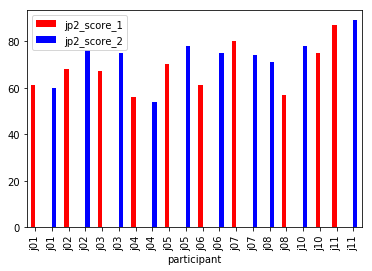

In [197]:
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(jp2_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
jp2_combo_bar = jp2_combo.plot(kind='bar',color=colors)

In [198]:
jp2_scores_1_mean = jp2_scores_1.mean()

In [199]:
jp2_scores_1_mean

jp2_score_1    68.2
dtype: float64

In [200]:
jp2_scores_1_std = jp2_scores_1.std()

In [201]:
jp2_scores_1_std

jp2_score_1    10.119289
dtype: float64

In [202]:
jp2_scores_2_mean = jp2_scores_2.mean()

In [203]:
jp2_scores_2_mean

jp2_score_2    73.0
dtype: float64

In [204]:
jp2_scores_2_std = jp2_scores_2.std()

In [205]:
jp2_scores_2_std

jp2_score_2    9.763879
dtype: float64

In [206]:
jp2_scores_med = jp2_scores.median()
jp2_scores_med

Game 1    67.5
Game 2    75.0
dtype: float64

# Joint choices in G1 (p2)

In [207]:
jp2_g1_counts = pd.DataFrame([j01_p2_g1_count, j02_p2_g1_count, j03_p2_g1_count, j04_p2_g1_count, j05_p2_g1_count , 
                j06_p2_g1_count, j07_p2_g1_count, j08_p2_g1_count, j10_p2_g1_count, j11_p2_g1_count],
                          index=['j01_p2_g1_count', 'j02_p2_g1_count', 'j03_p2_g1_count', 'j04_p2_g1_count', 'j05_p2_g1_count' , 
                'j06_p2_g1_count', 'j07_p2_g1_count', 'j08_p2_g1_count', 'j10_p2_g1_count', 'j11_p2_g1_count'])

In [208]:
jp2_g1_counts

,30,60,90
j01_p2_g1_count,28,29,23
j02_p2_g1_count,17,32,31
j03_p2_g1_count,23,15,42
j04_p2_g1_count,24,22,34
j05_p2_g1_count,11,20,49
j06_p2_g1_count,37,12,31
j07_p2_g1_count,7,13,60
j08_p2_g1_count,32,21,27
j10_p2_g1_count,9,18,53
j11_p2_g1_count,1,4,75


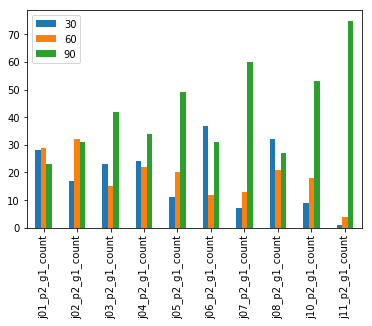

In [209]:
jp2_g1_counts_bar = jp2_g1_counts.plot.bar()

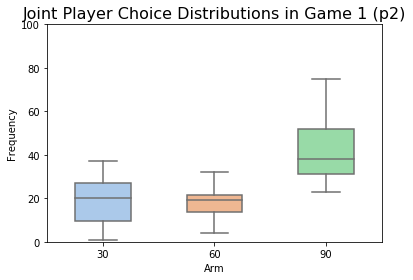

In [210]:
jp2_g1_counts_box = sns.boxplot( 
                 data=jp2_g1_counts, 
                 width=0.5,
                 palette="pastel")
jp2_g1_counts_box.axes.set_title("Joint Player Choice Distributions in Game 1 (p2)",
                    fontsize=16)

plot_file_name="jp2_g1_counts_box.jpg"
 
plt.ylim(0, 100)
jp2_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
jp2_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [211]:
jp2_g1_low = np.mean(jp2_g1_counts.iloc[:,0])
jp2_g1_med = np.mean(jp2_g1_counts.iloc[:,1])
jp2_g1_high = np.mean(jp2_g1_counts.iloc[:,2])

In [212]:
jp2_g1_low

18.9

In [213]:
jp2_g1_med

18.6

In [214]:
jp2_g1_high

42.5

In [215]:
jp2_g1_low_std = np.std(jp2_g1_counts.iloc[:,0])
jp2_g1_med_std = np.std(jp2_g1_counts.iloc[:,1])
jp2_g1_high_std = np.std(jp2_g1_counts.iloc[:,2])

In [216]:
jp2_g1_low_std

11.18436408563312

In [217]:
jp2_g1_med_std

7.8

In [218]:
jp2_g1_high_std

15.724185193516387

# Joint choices in G2 (p2)

In [219]:
jp2_g2_counts = pd.DataFrame([j01_p2_g2_count, j02_p2_g2_count, j03_p2_g2_count, j04_p2_g2_count, j05_p2_g2_count , 
                j06_p2_g2_count, j07_p2_g2_count, j08_p2_g2_count, j10_p2_g2_count, j11_p2_g2_count],
                          index=['j01_p2_g2_count', 'j02_p2_g2_count', 'j03_p2_g2_count', 'j04_p2_g2_count', 'j05_p2_g2_count' , 
                'j06_p2_g2_count', 'j07_p2_g2_count', 'j08_p2_g2_count', 'j10_p2_g2_count', 'j11_p2_g2_count'])

In [220]:
#prevent NaN values
jp2_g2_counts = jp2_g2_counts.fillna(0)
jp2_g2_counts

,30,60,90
j01_p2_g2_count,26.0,37.0,37.0
j02_p2_g2_count,9.0,26.0,65.0
j03_p2_g2_count,10.0,7.0,83.0
j04_p2_g2_count,40.0,40.0,20.0
j05_p2_g2_count,7.0,40.0,53.0
j06_p2_g2_count,8.0,43.0,49.0
j07_p2_g2_count,8.0,42.0,50.0
j08_p2_g2_count,16.0,19.0,65.0
j10_p2_g2_count,14.0,9.0,77.0
j11_p2_g2_count,0.0,1.0,99.0


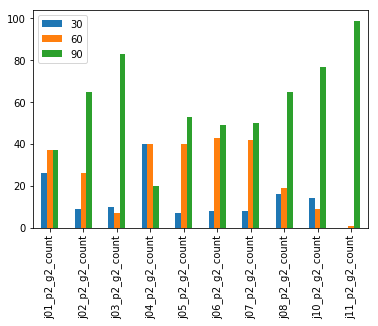

In [221]:
jp2_g2_counts_bar = jp2_g2_counts.plot.bar()

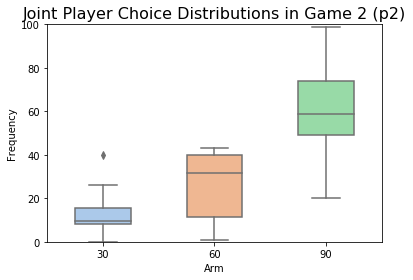

In [222]:
jp2_g2_counts_box = sns.boxplot( 
                 data=jp2_g2_counts, 
                 width=0.5,
                 palette="pastel")
jp2_g2_counts_box.axes.set_title("Joint Player Choice Distributions in Game 2 (p2)",
                    fontsize=16)

plot_file_name="jp2_g2_counts_box.jpg"
 
plt.ylim(0, 100)
jp2_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
jp2_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [223]:
jp2_g2_low = np.mean(jp2_g2_counts.iloc[:,0])
jp2_g2_med = np.mean(jp2_g2_counts.iloc[:,1])
jp2_g2_high = np.mean(jp2_g2_counts.iloc[:,2])

In [224]:
jp2_g2_low

13.8

In [225]:
jp2_g2_med

26.4

In [226]:
jp2_g2_high

59.8

In [227]:
jp2_g2_low_std = np.std(jp2_g2_counts.iloc[:,0])
jp2_g2_med_std = np.std(jp2_g2_counts.iloc[:,1])
jp2_g2_high_std = np.std(jp2_g2_counts.iloc[:,2])

In [228]:
jp2_g2_low_std

10.870142593360953

In [229]:
jp2_g2_med_std

15.428544973522293

In [230]:
jp2_g2_high_std

21.880585001320235

# Joint arrays (p2)

In [231]:
#pip install researchpy

In [232]:
import researchpy as rp

In [233]:
jp2_90_1 = np.array(jp2_g1_counts.iloc[:,2])
jp2_90_2 = np.array(jp2_g2_counts.iloc[:,2])

In [234]:
jp2_90_1

array([23, 31, 42, 34, 49, 31, 60, 27, 53, 75])

In [235]:
jp2_90_2

array([37., 65., 83., 20., 53., 49., 50., 65., 77., 99.])

In [236]:
jp2_60_1 = np.array(jp2_g1_counts.iloc[:,1])
jp2_60_2 = np.array(jp2_g2_counts.iloc[:,1])

In [237]:
jp2_60_1

array([29, 32, 15, 22, 20, 12, 13, 21, 18,  4])

In [238]:
jp2_60_2

array([37., 26.,  7., 40., 40., 43., 42., 19.,  9.,  1.])

In [239]:
jp2_30_1 = np.array(jp2_g1_counts.iloc[:,0])
jp2_30_2 = np.array(jp2_g2_counts.iloc[:,0])

In [240]:
jp2_30_1

array([28, 17, 23, 24, 11, 37,  7, 32,  9,  1])

In [241]:
jp2_30_2

array([26.,  9., 10., 40.,  7.,  8.,  8., 16., 14.,  0.])

# Joint choice percentages (p2)

In [242]:
jp2_90_p = sp.stats.ttest_rel(jp2_90_1,jp2_90_2)
jp2_60_p = sp.stats.ttest_rel(jp2_60_1,jp2_60_2)
jp2_30_p = sp.stats.ttest_rel(jp2_30_1,jp2_30_2)

In [243]:
jp2_90_p

Ttest_relResult(statistic=-2.8691554175614016, pvalue=0.018502152172572794)

In [244]:
jp2_60_p

Ttest_relResult(statistic=-1.5864497929006056, pvalue=0.14709908376255612)

In [245]:
jp2_30_p

Ttest_relResult(statistic=1.3057859107202234, pvalue=0.22401373271629818)

In [246]:
#maximizing and matching?

# Combined Joint probabilities

# Joint combined choices in G1

In [247]:
j_g1_counts = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, j03_p1_g1_count, 
              j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count, j05_p1_g1_count, j05_p2_g1_count, j06_p1_g1_count, 
              j06_p2_g1_count, j07_p1_g1_count, j07_p1_g1_count, j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count, 
              j10_p1_g1_count, j10_p2_g1_count, j11_p1_g1_count, j11_p2_g1_count],
                index = ['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                 'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count', 'j05_p1_g1_count', 
                  'j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 'j07_p1_g1_count', 
                    'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count', 'j10_p1_g1_count', 'j10_p2_g1_count', 
                    'j11_p1_g1_count', 'j11_p2_g1_count'])


In [248]:
j_g1_counts = j_g1_counts.fillna(0)
j_g1_counts 

,30,60,90
j01_p1_g1_count,31.0,30.0,19.0
j01_p2_g1_count,28.0,29.0,23.0
j02_p1_g1_count,27.0,25.0,28.0
j02_p2_g1_count,17.0,32.0,31.0
j03_p1_g1_count,16.0,22.0,42.0
j03_p2_g1_count,23.0,15.0,42.0
j04_p1_g1_count,20.0,31.0,29.0
j04_p2_g1_count,24.0,22.0,34.0
j05_p1_g1_count,3.0,11.0,66.0
j05_p2_g1_count,11.0,20.0,49.0


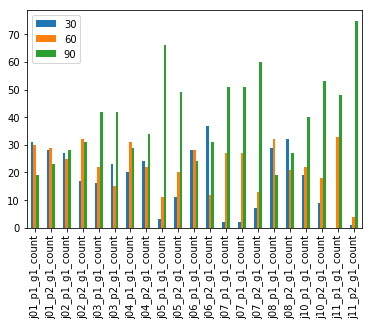

In [249]:
j_g1_counts_bar = j_g1_counts.plot.bar()

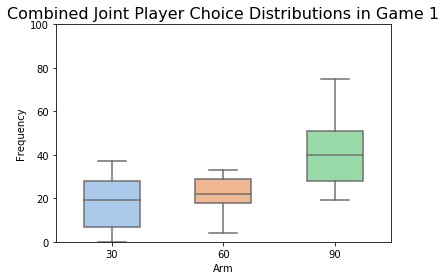

In [250]:
j_g1_counts_box = sns.boxplot( 
                 data=j_g1_counts, 
                 width=0.5,
                 palette="pastel")
j_g1_counts_box.axes.set_title("Combined Joint Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="j_g1_counts_box.jpg"
 
plt.ylim(0, 100)
j_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [251]:
j_g1_low = np.mean(j_g1_counts.iloc[:,0])
j_g1_med = np.mean(j_g1_counts.iloc[:,1])
j_g1_high = np.mean(j_g1_counts.iloc[:,2])

In [252]:
j_g1_low

17.428571428571427

In [253]:
j_g1_med

22.571428571428573

In [254]:
j_g1_high

40.095238095238095

In [255]:
j_g1_low_std = np.std(j_g1_counts.iloc[:,0])
j_g1_med_std = np.std(j_g1_counts.iloc[:,1])
j_g1_high_std = np.std(j_g1_counts.iloc[:,2])

In [256]:
j_g1_low_std

11.532857526263317

In [257]:
j_g1_med_std

7.865363664715784

In [258]:
j_g1_high_std

15.312319229346214

# Joint combined choices in G2

In [259]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, j03_p1_g2_count, 
              j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count, j05_p1_g2_count, j05_p2_g2_count, j06_p1_g2_count, 
              j06_p2_g2_count, j07_p1_g2_count, j07_p1_g2_count, j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count, 
              j10_p1_g2_count, j10_p2_g2_count, j11_p1_g2_count, j11_p2_g2_count],
                index = ['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                 'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count', 'j05_p1_g2_count', 
                  'j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 'j07_p1_g2_count', 
                    'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count', 'j10_p1_g2_count', 'j10_p2_g2_count', 
                    'j11_p1_g2_count', 'j11_p2_g2_count'])


In [260]:
j_g2_counts = j_g2_counts.fillna(0)
j_g2_counts 

,30,60,90
j01_p1_g2_count,13.0,22.0,45.0
j01_p2_g2_count,26.0,37.0,37.0
j02_p1_g2_count,20.0,25.0,35.0
j02_p2_g2_count,9.0,26.0,65.0
j03_p1_g2_count,3.0,17.0,60.0
j03_p2_g2_count,10.0,7.0,83.0
j04_p1_g2_count,33.0,26.0,21.0
j04_p2_g2_count,40.0,40.0,20.0
j05_p1_g2_count,12.0,9.0,59.0
j05_p2_g2_count,7.0,40.0,53.0


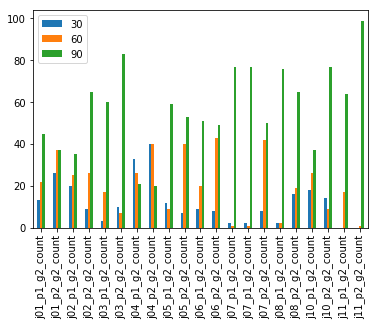

In [261]:
j_g2_counts_bar = j_g2_counts.plot.bar()

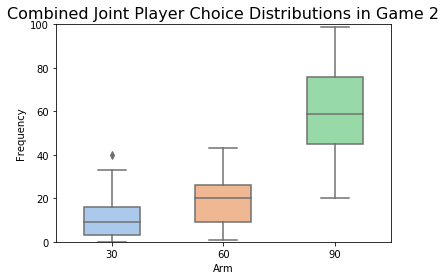

In [262]:
j_g2_counts_box = sns.boxplot( 
                 data=j_g2_counts, 
                 width=0.5,
                 palette="pastel")
j_g2_counts_box.axes.set_title("Combined Joint Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="j_g2_counts_box.jpg"
 
plt.ylim(0, 100)
j_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [263]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

In [264]:
j_g2_low

12.0

In [265]:
j_g2_med

20.476190476190474

In [266]:
j_g2_high

57.142857142857146

In [267]:
j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [268]:
j_g2_low_std

10.442586798663397

In [269]:
j_g2_med_std

13.92366620993277

In [270]:
j_g2_high_std

20.057739782190513

# Joint combined arrays

In [271]:
#pip install researchpy

In [272]:
import researchpy as rp

In [273]:
j_90_1 = np.array(j_g1_counts.iloc[:,2])
j_90_2 = np.array(j_g2_counts.iloc[:,2])

In [274]:
j_90_1

array([19., 23., 28., 31., 42., 42., 29., 34., 66., 49., 24., 31., 51.,
       51., 60., 19., 27., 40., 53., 48., 75.])

In [275]:
j_90_2

array([45., 37., 35., 65., 60., 83., 21., 20., 59., 53., 51., 49., 77.,
       77., 50., 76., 65., 37., 77., 64., 99.])

In [276]:
j_60_1 = np.array(j_g1_counts.iloc[:,1])
j_60_2 = np.array(j_g2_counts.iloc[:,1])

In [277]:
j_60_1

array([30., 29., 25., 32., 22., 15., 31., 22., 11., 20., 28., 12., 27.,
       27., 13., 32., 21., 22., 18., 33.,  4.])

In [278]:
j_60_2

array([22., 37., 25., 26., 17.,  7., 26., 40.,  9., 40., 20., 43.,  1.,
        1., 42.,  2., 19., 26.,  9., 17.,  1.])

In [279]:
j_30_1 = np.array(j_g1_counts.iloc[:,0])
j_30_2 = np.array(j_g2_counts.iloc[:,0])

In [280]:
j_30_1

array([31., 28., 27., 17., 16., 23., 20., 24.,  3., 11., 28., 37.,  2.,
        2.,  7., 29., 32., 19.,  9.,  0.,  1.])

In [281]:
j_30_2

array([13., 26., 20.,  9.,  3., 10., 33., 40., 12.,  7.,  9.,  8.,  2.,
        2.,  8.,  2., 16., 18., 14.,  0.,  0.])

# Joint combined choice statistics

In [282]:
j_90_p = sp.stats.ttest_rel(j_90_1,j_90_2)
j_60_p = sp.stats.ttest_rel(j_60_1,j_60_2)
j_30_p = sp.stats.ttest_rel(j_30_1,j_30_2)

In [283]:
j_90_p

Ttest_relResult(statistic=-4.200182936953764, pvalue=0.00044052970450619454)

In [284]:
j_60_p

Ttest_relResult(statistic=0.5844525385658691, pvalue=0.5654510795393086)

In [285]:
j_30_p

Ttest_relResult(statistic=2.0669275142376007, pvalue=0.05193140416858686)

In [286]:
#maximizing and matching?

# End of SMAB3 analysis

In [287]:
#hypothesis: scores lower for same gender pairs: male-male
'''here i compared scores of pairs of mixed gender and same gender pairs. there are a lot of different types of analyses you can
do on the choice data, and you can group the data by demographics, questionnaire responses, etc.'''

In [288]:
scores_f = pd.DataFrame([j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j04_p1_g1_score,
            j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,
            j07_p2_g2_score,j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score])

In [289]:
scores_mix = pd.DataFrame([j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j02_p1_g1_score,
            j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,
            j05_p2_g2_score,j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j06_p1_g1_score,
            j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score])

In [290]:
#m_mean=scores_m.mean()
f_mean=scores_f.mean()
mix_mean=scores_mix.mean()

In [291]:
#m_mean

In [292]:
f_mean

0    69.375
dtype: float64

In [293]:
mix_mean

0    68.85
dtype: float64

In [294]:
j_combo = j_combo.sort_values(by=['participant'])

NameError: name 'j_combo' is not defined

In [ ]:
j_combo_bar = j_combo.plot(kind='bar',color=colors)

In [ ]:
j_score_diff = pd.DataFrame({'participant':['j01_p1','j01_p2','j02_p1','j02_p2','j03_p1','j03_p2','j04_p1','j04_p2',
                                          'j05_p1','j05_p2','j06_p1','j06_p2','j07_p1','j07_p2','j06_p1','j06_p2'], 'score_diff':
     [j01_p1_diff,j01_p2_diff,j02_p1_diff,j02_p2_diff,j03_p1_diff,j03_p2_diff,j04_p1_diff,j04_p2_diff,
     j05_p1_diff,j05_p2_diff,j06_p1_diff,j06_p2_diff,j07_p1_diff,j07_p2_diff,j08_p1_diff,j08_p2_diff]})

In [ ]:
j_score_diff

In [ ]:
#impairs learning?

In [ ]:
#pattern within sessions for score_diff?
#5 ppl did worse second time; joint interfered with learning

In [ ]:
j_score_diff_mean = j_score_diff['score_diff'].mean()

In [ ]:
j_score_diff_mean

In [ ]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

In [ ]:
#social matching

In [ ]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, 
                            j03_p1_g2_count, j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count,
                           j05_p1_g2_count,j05_p2_g2_count, j06_p1_g2_count, j06_p2_g2_count, j07_p1_g2_count, 
                            j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count],
                          index=['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                            'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count',
                           'j05_p1_g2_count','j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                            'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count'])

In [ ]:
j_g2_counts

In [ ]:
j_60_p = sp.stats.ttest_rel(j_g1_counts.iloc[:,1],j_g2_counts.iloc[:,1])

In [ ]:
j_60_p

In [ ]:
j_30_p = sp.stats.ttest_rel(j_g1_counts.iloc[:,0],j_g2_counts.iloc[:,0])

In [ ]:
j_30_p

In [ ]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [ ]:
j_g2_low

In [ ]:
j_g2_med

In [ ]:
j_g2_high

In [ ]:
j_g1_counts_bar = j_g1_counts.plot.bar()

In [ ]:
j_g2_counts_bar = j_g2_counts.plot.bar()

In [ ]:
j_g1_counts_box = sns.boxplot( 
                 data=j_g1_counts, 
                 width=0.5,
                 palette="pastel")
j_g1_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="j_g1_counts_box.jpg"

plt.ylim(0, 100)
j_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
j_g2_counts_box = sns.boxplot( 
                 data=j_g2_counts, 
                 width=0.5,
                 palette="pastel")
j_g2_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="j_g2_counts_box.jpg"

plt.ylim(0, 100)
j_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
hannah_counts = pd.DataFrame([s08_p1_g1_count,s08_p1_g2_count,s09_p1_g1_count,s09_p1_g2_count,j01_p1_g1_count,
                              j01_p1_g2_count,j01_p2_g1_count,j01_p2_g2_count,j05_p1_g1_count,j05_p1_g2_count,j05_p1_g1_count,
                              j05_p2_g2_count],
                          index=['s08 Game 1','s08 Game 2','s09 Game 1','s09 Game 2','j01_1 Game 1','j01_1 Game 2',
                                'j01_2 Game 1','j01_2 Game 2','j05_1 Game 1','j05_1 Game 2','j05_2 Game 1','j05_2 Game 2'])

In [ ]:
hannah_counts

In [ ]:
hannah_counts.to_pickle('hannah_counts_table.pkl')

In [ ]:
hannah_counts_bar = hannah_counts.plot.bar(title='Choice Distributions')
plt.tight_layout()
plt.savefig('hannah_counts.eps',format='eps',dpi=1000)

# Combined Tables

In [ ]:
#NEEDS WORK
scores_df = pd.DataFrame({'score':[s_scores_1_mean, s_scores_2_mean, j_scores_1_mean, j_scores_2_mean],
                       'std':[s_scores_1_std,s_scores_2_std,j_scores_1_std,j_scores_2_std]},index = ['s_1','s_2',
                                                                                                     'j_1', 'j_2'])

In [ ]:
s_scores_1_mean

In [ ]:
pd.to_numeric(s_scores_1_mean)

In [ ]:
scores_df

In [ ]:
counts_df = pd.DataFrame({'low':[s_g1_low,s_g2_low,j_g1_low,j_g2_low],'medium':[s_g1_med,s_g2_med,j_g1_med,j_g2_med],
                          'high':[s_g1_high,s_g2_high,j_g1_high,j_g2_high]},index = ['s_1','s_2','j_1', 'j_2'])
#add standard deviations

In [ ]:
counts_df

In [ ]:
#j learn to favor medium over the low in game 2

In [ ]:
counts_std_df = pd.DataFrame({'low':[s_g1_low_std,s_g2_low_std,j_g1_low_std,j_g2_low_std],'medium':[s_g1_med_std,s_g2_med_std,j_g1_med_std,j_g2_med_std],
                          'high':[s_g1_high_std,s_g2_high_std,j_g1_high_std,j_g2_high_std]},index = ['s_1','s_2','j_1', 'j_2'])

In [ ]:
counts_std_df

In [ ]:
#high deviations in high and med in game 2
#evidence of 2 subgroups?

# Maximizing/Matching

In [ ]:
'''Here we compare the choice distributions to idealized models of two decision-making strategies: matching and
maximizing. Matching would be choosing each each hole proportionally to its reward rate, and maximizing would be 
always choosing the high reward hole.'''

In [ ]:
scores

In [300]:
'''JSD: Jensen Shannon Divergence. Measures the similarity between two probability distributions. Taken from 
https://gist.github.com/zhiyzuo/f80e2b1cfb493a5711330d271a228a3d. *Note: probability distributions need to be
normalized.'''
'''parameters: p and q are the two probability distributions to be compared.'''
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [295]:
''''Are ppl using a strategy similar to their partner's? This functions calls jsd for p1 and for p2. *UNFINISHED* 
DO NOT USE.'''
#calls jsd for p1 and p2 and for p1 and p2 with the mean
def compare_strat(p1,p2):
    strat = jsd(p1,p2)
    comp_1 = jsd(p1,[j_g1_low,j_g1_med,j_g1_high])
    comp_2 = jsd(p2,[j_g1_low,j_g1_med,j_g1_high])
    return strat, comp_1, comp_2

In [ ]:
#jsd_1_strat

In [ ]:
#jsd_1_comp

In [296]:
'''Idealized probability distributions to use for comparison. You can change these or add more models.'''
maximize = [0,0,100]
match = [30/180 * 100,60/180 * 100,50]

In [302]:
'''This function calls jsd. 
Input: counts- a player's choice distributions in a particular game (ex. s01_p1_g1_counts)
Output: maxi- JSD score for the maximizing strategy
        matchi- JSD score for the matching strategy'''
def call_jsd(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [ ]:
'''Optional: Idealized probability distributions to use for comparison. These assume a social strategy in which the probability
distributions of both partners in a joint session are averaged (all holes reward at a 60% rate.'''
social_max = [0, 100, 0]
social_match = [30/180 * 100,30/180 * 100, 30/180 * 100]

In [ ]:
'''Calls jsd with the social distributions'''
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [ ]:
s01_p1_g1_count

In [ ]:
from scipy import stats

In [ ]:
#test = jsd(maximize,match)

In [ ]:
#test

In [ ]:
s01 = 'match'

In [297]:
s05_p1_g2_count

90    80
Name: probability, dtype: int64

In [ ]:
s05_p1_g2_count = [11,0,89]

In [301]:
'''Call 'call_jsd' for each participant for each game in the single player sessions.'''
s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s02_g1_max,s02_g1_match = call_jsd(s02_p1_g1_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd(s05_p1_g1_count)
s05_g2_max,s05_g2_match = call_jsd(s05_p1_g2_count)
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd([0,6,74])
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)

NameError: name 's02_p1_g1_count' is not defined

In [ ]:
s06_p1_g2_count

In [ ]:
'''Create a dataframe for single player game 1 jsd scores, with a column for each strategy.'''
s_jsd_g1 = pd.DataFrame({'max':[s01_g1_max,s02_g1_max,s03_g1_max,s05_g1_max,s06_g1_max,s07_g1_max,s08_g1_max,
                                s09_g1_max],
                      'match':[s01_g1_match,s02_g1_match,s03_g1_match,s05_g1_match
                               ,s06_g1_match,s07_g1_match,s08_g1_match,s09_g1_match]},
                        index=['s01', 's02', 's03','s05','s06','s07','s08','s09'])

In [ ]:
'''Create a dataframe for single player game 2 jsd scores, with a column for each strategy.'''
s_jsd_g2 = pd.DataFrame({'max':[s01_g2_max,s03_g2_max,s05_g2_max,s06_g2_max,s07_g2_max,s08_g2_max,
                                s09_g2_max],
                      'match':[s01_g2_match,s03_g2_match,s05_g2_match
                               ,s06_g2_match,s07_g2_match,s08_g2_match,s09_g2_match]},
                        index=['s01', 's03','s05','s06','s07','s08','s09'])

In [ ]:
#NOT WORKING
def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        if social == True:
            if num >= jsd(social_max,social_match):
                types = types.append({'type' : 'neither'},ignore_index=True)
        else:
            if num >= jsd(maximize,match):
                types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [ ]:
#s_jsd.apply(check_type,axis=1)

In [ ]:
#s_types_g1 = check_type(s_jsd_g1)

In [ ]:
#s_types_g2 = check_type(s_jsd_g1)

In [ ]:
#s_types_g1.drop([0])

In [ ]:
#s_types_g2.drop([0])

In [ ]:
threshold = jsd(maximize,match)

In [ ]:
threshold

In [ ]:
s_jsd_g1

In [ ]:
s_jsd_g2

In [ ]:
'''Call 'call_jsd' for each participant for each game in the joint sessions.'''
j01_p1_g1_max,j01_p1_g1_match = call_jsd(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd(j08_p2_g2_count)

In [ ]:
'''Create a dataframe for joint game 1 jsd scores, with a column for each strategy.'''
j_jsd_g1 = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
'''Create a dataframe for joint game 2 jsd scores, with a column for each strategy.'''
j_jsd_g2 = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
#j_types_g1 = check_type(j_jsd_g1)

In [ ]:
#j_types_g2 = check_type(j_jsd_g2)

In [ ]:
#j_types_g1.drop([0])

In [ ]:
#j_types_g2.drop([0])

In [ ]:
j_jsd_g1

In [ ]:
j_jsd_g2

In [ ]:
#same for joint using "social"

In [ ]:
'''Call 'call_jsd_social' for each participant for each game in the joint sessions.'''
j01_p1_g1_max,j01_p1_g1_match = call_jsd_social(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd_social(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd_social(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd_social(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd_social(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd_social(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd_social(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd_social(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd_social(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd_social(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd_social(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd_social(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd_social(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd_social(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd_social(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd_social(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd_social(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd_social(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd_social(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd_social(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd_social(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd_social(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd_social(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd_social(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd_social(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd_social(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd_social(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd_social(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd_social(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd_social(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd_social(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd_social(j08_p2_g2_count)

In [ ]:
'''Create a dataframe for joint game 1 social jsd scores, with a column for each strategy.'''
j_jsd_g1_social = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
'''Create a dataframe for joint game 2 social jsd scores, with a column for each strategy.'''
j_jsd_g2_social = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
#j_types_social = check_type(j_jsd_social,True)

In [ ]:
#j_types_social.drop([0])

In [ ]:
#j_jsd_social.drop([0])

In [ ]:
#issue

In [ ]:
j_jsd_g1_social

In [ ]:
threshold

In [ ]:
j_jsd_g2_social

In [ ]:
import matplotlib.lines as mlines

In [ ]:
#colors_jsd = [['lightcoral','red','lightcoral','red','bisque','orange','bisque','orange','palegreen','green','palegreen','green',
              #'lightblue','blue','lightblue','blue','mediumslateblue','indigo','mediumslateblue','indigo','lightpink','deeppink',
              #'lightpink','deeppink','yellow','gold','yellow','gold','lightgray','gray','lightgray','gray']              

In [ ]:
import itertools

In [ ]:
'''Here I think I tried to create colors for each subject in each condition for use in graphs. I DON'T think this is 
a good way to do this.'''
colors_jsd_j = ['red','lightcoral','orange','darkorange','green','palegreen',
              'blue','darkblue','hotpink','pink','purple','plum','peru','saddlebrown','gray','lightgray']
colors_jsd_s_g1 = ['red','orange','green','blue','pink','purple','peru','cyan']
colors_jsd_s_g2 = ['red','green','blue','pink','purple','peru','cyan']
markers_jsd = ['o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v'
          'o','v','o','v','o','v','o','v']
colors

In [ ]:
'''Here I print the means of the JSD values in each condition, just to see what they are.'''

In [ ]:
s_jsd_g1.mean()

In [ ]:
j_jsd_g1.mean()

In [ ]:
s_jsd_g2.mean()

In [ ]:
j_jsd_g2.mean()

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
#create proxy artist for legend
patches = []
for index,row in j_jsd_g1.iterrows():
    for i in colors_jsd_j:
        patches.append(mpatches.Patch(color=i, label=index))

# legend not working

In [ ]:
'''Here I try to plot the JSD Values. Continued below under 'JSD with gender.''''

In [ ]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g1_plot = j_jsd_g1.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g1_plot.add_line(line1)
#j_jsd_g1_plot.add_line(line2)
#j_jsd_g1_plot.add_line(line3)

#plt.legend(handles=patches)
plt.savefig('j_jsd_1.eps',format='eps',dpi=1000)
plt.show()




#color code pairs together

In [ ]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_g2_plot = plt.subplots()
j_jsd_g2_plot = j_jsd_g2.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')
line1 = mlines.Line2D([-1, 0.4],[-1, 0.4], color='red')
#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g2_plot.add_line(line1)
#j_jsd_g2_plot.add_line(line2)
plt.savefig('j_jsd_2.eps',format='eps',dpi=1000)
plt.show()


#color code pairs together

In [ ]:
s_jsd_g1_plot = s_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g1,title='Single Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([-1, 0.4],[-1, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
s_jsd_g2_plot = s_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g2_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('s_jsd_2.eps',format='eps',dpi=1000)

In [ ]:
threshold_social = jsd(social_max,social_match)

In [ ]:
threshold_social

In [ ]:
j_jsd_g1_social_plot = j_jsd_g1_social.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_j,title='Multi Player JSD Social Values Game 1')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
#line1 = mlines.Line2D([0.3183, 0.3183],[-0.03, 0.55], color='red')
#line2 = mlines.Line2D([0, 0.8],[0.3183, 0.3183])
#j_jsd_g1_social_plot.add_line(line1)
#j_jsd_g1_social_plot.add_line(line2)

line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g1_social_plot.add_line(line1)
plt.savefig('j_jsd_social_1.eps',format='eps',dpi=1000)
#everyone could be classified as a matcher. everyone to the left of the red line could be using both
#NEED TO: color differently those who were more of maximizers than matchers!!!

In [ ]:
j_jsd_g2_social_plot = j_jsd_g2_social.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_j,title='Multi Player JSD Social Values Game 2')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g2_social_plot.add_line(line1)
plt.savefig('j_jsd_social_2.eps',format='eps',dpi=1000)

### NOT WORKING
def check_type_3(row):
        maxi = row["max"]
        matchi = row["match"]
        if maxi < matchi:
            row['type'] = 'max'
            num = maxi
        elif matchi < maxi:
            row['type'] = 'match'
            num = matchi
        else:
            row['type'] = 'neither'
        if num >= jsd(maximize,match):
            row['type'] = 'neither'
            
def check_type_2(df):
    for row in df.itertuples(index=True, name='Pandas'):
        print(index,row["max"],row["match"])
        if row["match"] < row["max"] and row["match"] < jsd(maximize,match):
            df.at[index,'type'] = 'match'
        elif row["max"] < row["match"] and row["max"] < jsd(maximize,match):
            df.at[index,'type'] = 'max'
        else:
            df.at[index,'type'] = 'neither'

# Gender Diff

In [ ]:
reader = csv.reader( open('gender.csv'))
data = [row for row in reader]
gender = pd.DataFrame(np.array(data))
gender = gender.rename(columns = {0:"participant", 1:"gender "})
gender_s = gender.iloc[16:,:]
gender_j = gender.iloc[:16,:]
gender_s.drop([19])

In [ ]:
gender_s

In [ ]:
gender_j

In [ ]:
gender_s = gender_s.merge(s_scores_1,on='participant')

In [ ]:
gender_s = gender_s.merge(s_scores_2,on='participant')

In [ ]:
gender_s
#gender_s.drop(['score'],axis=1)

In [ ]:
gender_s = gender_s.merge(score_diff,on='participant')

In [ ]:
gender_s

In [ ]:
#gender_s_m = gender_s.gender == "male"
#gender_s['score_x'].mean()

In [ ]:
j_scores_1['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']
j_scores_2['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']

In [ ]:
j_score_diff['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']

In [ ]:
j_score_diff

In [ ]:
gender_j = gender_j.merge(j_scores_1,on='participant')
#gender_j = gender_j.merge(j_scores_2,on='participant')
#gender_j = gender_j.merge(j_score_diff,on='participant')

In [ ]:
gender_j

In [ ]:
gender_j = gender_j.merge(j_scores_2,on='participant')

In [ ]:
gender_j

In [ ]:
gender_j = gender_j.merge(j_score_diff,on='participant')

In [ ]:
gender_j

In [ ]:
#don't remove first 20 trials
def organize_trial_by_trial_all(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    #df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.apply(pd.to_numeric)
    df.head()
    
    #combining info in the same trial for both players together in the same row
    #player1 = df[df['player'] == 1].drop(columns = "P2 score").drop(columns = "player")
    #player1 = player1.reset_index().drop(columns = "index")
    #player1 = player1.rename(columns = {"arm":"P1 arm", "probability":"P1 prob", "reward":"P1 reward"})

    #player2 = df[df['player'] == 2].drop(columns = "P1 score").drop(columns = 'trial').drop(columns = 'player')
    #player2 = player2.reset_index().drop(columns = "index")
    #player2 = player2.rename(columns = {"arm":"P2 arm", "probability":"P2 prob", "reward":"P2 reward"})

    #result = pd.concat([player1, player2], axis=1, sort=False)
    return df

In [ ]:
#don't remove first 20 trials
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    #remove first 20 trials for g2
    #df_p1_g2 = df_p1_g2[20:]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [ ]:
import glob,os

In [ ]:
for filename in glob.iglob('/data/**', recursive=True):
    if os.path.isfile(filename): # filter dirs
        filename = organize_trial_by_trial_all(filename)

# jsd with gender

In [ ]:
colors_jsd_s_g1=['b','b','r','b','b','r','r','r']
colors_jsd_s_g2=['b','r','b','b','r','r','r']

In [ ]:
s_jsd_g1_plot = s_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g1,title='Single Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
s_jsd_g2_plot = s_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
colors_jsd_j = ['purple','green','green','purple','r','r','r','r','purple','green','green','purple','r','r','r','r']

In [ ]:
fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g1_plot = j_jsd_g1.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g1_plot.add_line(line1)
#j_jsd_g1_plot.add_line(line2)
#j_jsd_g1_plot.add_line(line3)

#plt.legend(handles=patches)
plt.savefig('j_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g2_plot = j_jsd_g2.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')


line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])


j_jsd_g2_plot.add_line(line1)


#plt.legend(handles=patches)
plt.savefig('j_jsd_2.eps',format='eps',dpi=1000)
plt.show()